In [2]:
import os
os.getcwd()

# Change directory to main repository directory in order to install modules
os.chdir(f"{os.environ['HOME']}/Code/jwst/")

In [1]:
import h5py
import numpy as np

from matplotlib import pyplot as plt

In [30]:
simulations = "/data/typhon2/hattie/jwst/soss_simulations/10_soss_sims_randomised_target.h5"

simulation_list = []
with h5py.File(simulations, "r") as f:
    for key in f.keys():
        if key.startswith("data"):
            simulation_list.append(f[key][:])


In [31]:
simulation_array = np.array(simulation_list)
simulation_array.shape

(10, 256, 2048)

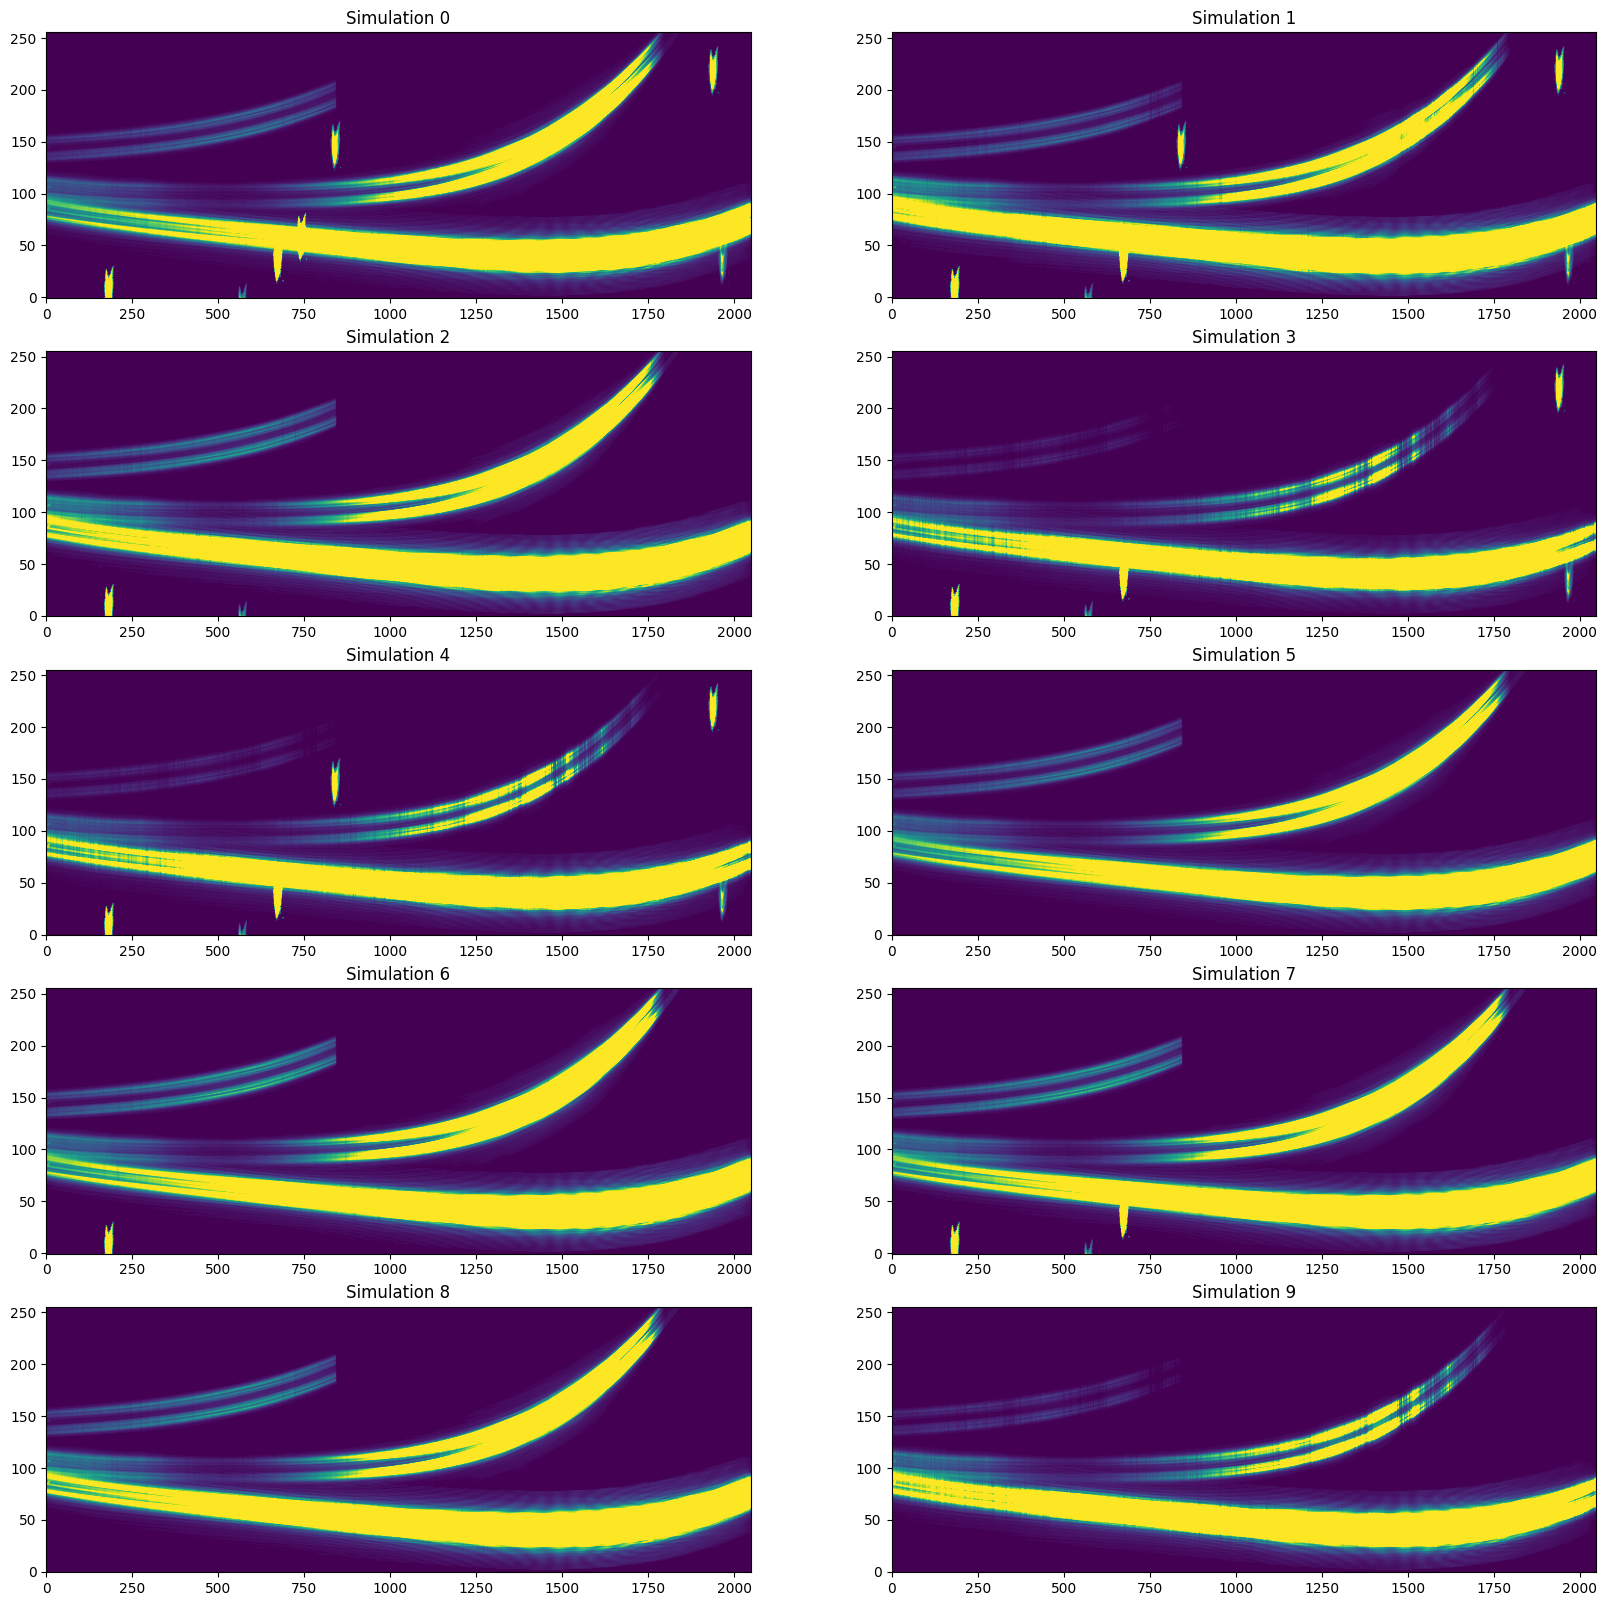

In [32]:
# plot multiple spectra from simualtion_array
fig, axes = plt.subplots(5, 2, figsize=(20, 20))
for i, ax in enumerate(axes.flat):
    ax.imshow(simulation_array[i], origin="lower", aspect="auto", vmax=1e6)
    ax.set_title(f"Simulation {i}")
